# 4. 便捷函數

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 4.2 相關性分析

In [8]:
bhp  = np.loadtxt('BHP.csv', delimiter=',', usecols=(6,), unpack=True)
bhp_returns = np.diff(bhp) / bhp[ : -1]
bhp_returns[:3]

array([ 0.02048656, -0.01129235, -0.01332487])

In [9]:
vale  = np.loadtxt('VALE.csv', delimiter=',', usecols=(6,), unpack=True)
vale_returns = np.diff(vale) / vale[ : -1]
vale_returns[:3]

array([ 0.02211231,  0.00028466,  0.00483779])

In [10]:
covariance = np.cov(bhp_returns, vale_returns)
covariance

array([[ 0.00028179,  0.00019766],
       [ 0.00019766,  0.00030123]])

In [11]:
covariance.diagonal()

array([ 0.00028179,  0.00030123])

In [12]:
covariance.trace()

0.00058302354992027805

In [13]:
print('correlation = {}'.format(covariance / (bhp_returns.std() * vale_returns.std()) ))

correlation = [[ 1.00173366  0.70264666]
 [ 0.70264666  1.0708476 ]]


In [14]:
print('correlation  coefficience = {}'.format(np.corrcoef(bhp_returns, vale_returns )))

correlation  coefficience = [[ 1.          0.67841747]
 [ 0.67841747  1.        ]]


In [15]:
t = np.arange(len(bhp_returns))

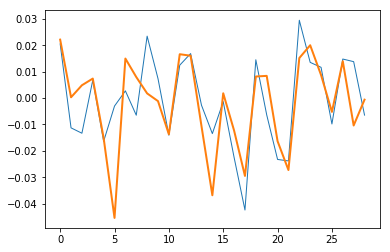

In [23]:
plt.plot(t, bhp_returns, lw = 1)
plt.plot(t, vale_returns, lw = 2)
plt.show()

## 4.4 多項式擬合

In [46]:
bhp  = np.loadtxt('BHP.csv', delimiter=',', usecols=(6,), unpack=True)

In [54]:
poly = np.polyfit(t, bhp[:-1],  5)
poly

array([  8.46787476e-07,   3.66997637e-04,  -2.07188497e-02,
         3.32762563e-01,  -1.76618780e+00,   9.56618680e+01])

In [55]:
print('next {}'.format(np.polyval(poly, t[-1] + 1)))

next 95.92275036840557


In [56]:
np.roots(poly)

array([-485.48564731 +0.j        ,   29.92899985+13.05876316j,
         29.92899985-13.05876316j,   -3.88614362+14.25236139j,
         -3.88614362-14.25236139j])

In [57]:
der = np.polyder(poly)
der

array([  4.23393738e-06,   1.46799055e-03,  -6.21565492e-02,
         6.65525126e-01,  -1.76618780e+00])

In [58]:
estremes = np.roots(der)
estremes

array([-385.83217907,   23.76678708,   11.33057231,    4.01487179])

In [59]:
values = np.polyval(poly, t)
values

array([ 95.66186797,  94.20809173,  93.30069089,  92.82869128,
        92.69012991,  92.79215657,  93.05113546,  93.39274679,
        93.75208839,  94.07377736,  94.31205165,  94.43087166,
        94.4040219 ,  94.21521259,  93.85818126,  93.33679435,
        92.66514888,  91.86767401,  90.97923269,  90.04522323,
        89.12168099,  88.27537991,  87.58393417,  87.13589982,
        87.03087635,  87.37960834,  88.30408704,  89.93765203,  92.42509279])

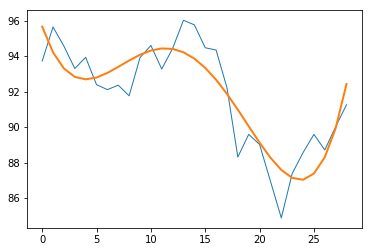

In [60]:
plot(t, bhp[:-1], lw = 1)
plot(t, np.polyval(poly, t), lw = 2)
# plot(t, np.polyval(der, t), lw = 3)
# plot(estremes, np.zeros(4), color = 'red')
show()

## 4.6 成交量(volume) (OBV, On-Balance Volume)

In [61]:
c, v  = np.loadtxt('BHP.csv', delimiter=',', usecols=(6, 7), unpack=True)

In [69]:
changes = np.diff(c)
changes

array([ 1.92, -1.08, -1.26,  0.63, -1.54, -0.28,  0.25, -0.6 ,  2.15,
        0.69, -1.33,  1.16,  1.59, -0.26, -1.29, -0.13, -2.12, -3.91,
        1.28, -0.57, -2.07, -2.07,  2.5 ,  1.18,  1.03, -0.88,  1.31,
        1.24, -0.59])

In [70]:
signs = np.sign(changes)
signs

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

In [71]:
pieces = np.piecewise(changes, [changes < 0, changes > 0], [-1, 1])
pieces

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

In [75]:
np.array_equal(signs, pieces)

True

In [76]:
obv = v[1:] * signs
obv

array([ 2620800., -2461300., -3270900.,  2650200., -4667300., -5359800.,
        7768400., -4799100.,  3448300.,  4719800., -3898900.,  3727700.,
        3379400., -2463900., -3590900., -3805000., -3271700., -5507800.,
        2996800., -3434800., -5008300., -7809799.,  3947100.,  3809700.,
        3098200., -3500200.,  4285600.,  3918800., -3632200.])

## 4.8 避免使用循環

In [88]:
o, h, l, c = np.loadtxt('BHP.csv', delimiter=',', usecols=(3, 4, 5, 6), unpack=True)

In [92]:
def calc_profit(open, high, low, close):
    buy = open * float(1)
    if low < buy < high:
        return (close - buy) /buy
    else:
        return 0 

In [93]:
func = np.vectorize(calc_profit)

In [94]:
profits = func(o, h, l, c)
profits

array([ 0.00655139,  0.01131437,  0.00116464,  0.00679832,  0.01381543,
        0.00054148, -0.01105862,  0.00467747, -0.00714131,  0.00459991,
       -0.00221496, -0.01872699,  0.00575141,  0.0012513 , -0.00374532,
       -0.02113771,  0.00661545, -0.00774693, -0.00775281,  0.01529918,
        0.00964047,  0.02802081, -0.01656818,  0.00068713, -0.01083436,
       -0.00599135, -0.00882682,  0.005024  ,  0.00440238,  0.00276488])

In [101]:
round( 100 * np.average(profits[profits < 0]), 2)

-1.01

## 4.10 使用 hanning 函數平滑數據

In [106]:
N = 8
weights = np.hanning(N)
weights

array([ 0.        ,  0.1882551 ,  0.61126047,  0.95048443,  0.95048443,
        0.61126047,  0.1882551 ,  0.        ])

In [136]:
bhp_returns = np.diff(bhp) / bhp[:-1]
smooth_bhp = np.convolve(weights / weights.sum(), bhp_returns)

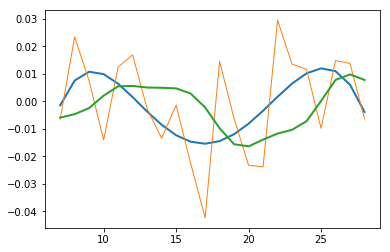

In [137]:
# 多項式擬合
K = 5
t = np.arange(N -1, len(bhp_returns))
poly = np.polyfit(t, bhp_returns[N-1:], K)
poly_bhp = np.polyval( poly, t)
plot(t, poly_bhp, lw = 2)
plot(t, bhp_returns[N-1:], lw = 1)
plot(t, smooth_bhp[N-1: -N + 1], lw = 2)
show()